In [1]:
!nvidia-smi

Wed Jun 21 08:59:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.105.01   Driver Version: 515.105.01   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100S-PCI...  On   | 00000000:25:00.0 Off |                    0 |
| N/A   59C    P0   187W / 250W |  28566MiB / 32768MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100S-PCI...  On   | 00000000:81:00.0 Off |                    0 |
| N/A   

In [2]:
import argparse
import torch
import torch.nn as nn
from torchvision import transforms
from src.dataset.vanilla_lpcvc import LPCVCDataset
import torchvision

from src.model.model import UNET

from tqdm import tqdm
import random
import numpy as np

import matplotlib.pyplot as plt

/home/infres/nvernier-22/anaconda3/envs/lpcvc/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = UNET(in_channels=3, out_channels=14).to('cuda')

In [4]:
train_dataset = LPCVCDataset(datapath='/home/infres/nvernier-22/project/LPCVC-2023/dataset/', n_class=14, train=True)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)


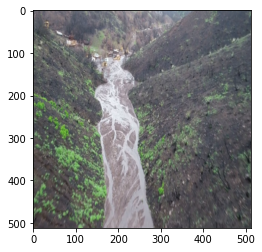

In [5]:
img, label = train_dataset[2]

plt.imshow(np.transpose(img, (1,2,0)))


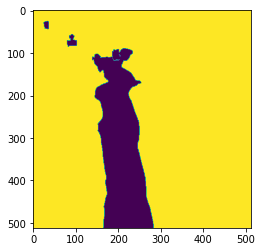

In [6]:
plt.imshow(label[0])

In [7]:
LEARNING_RATE = 1e-4


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scaler = torch.cuda.amp.GradScaler()

In [21]:
def train(model, criterion, optimizer, scaler, train_loader):
    model.train()
    running_loss=0
    loop = tqdm(train_loader)
    
    for batch_idx, (data, targets) in enumerate(loop):
        
        data = data.to(device='cuda')
        targets = targets.to(device='cuda')        
            
        with torch.cuda.amp.autocast():
            outputs=model(data)
            loss = criterion(outputs, targets)
            
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        loop.set_postfix(loss=loss.item())
            
        running_loss += loss.item()

    train_loss=running_loss/len(train_loader)
        
    print('Train Loss: %.3f'%(train_loss))
    return(train_loss)

In [56]:
for epoch in range(1, 100):
    print('\nEpoch : %d'%epoch)
    train(model, criterion=criterion, optimizer=optimizer, scaler=scaler, train_loader=train_loader)
    


Epoch : 1


100%|██████████| 64/64 [00:36<00:00,  1.77it/s, loss=0.128]


Train Loss: 0.133

Epoch : 2


100%|██████████| 64/64 [00:32<00:00,  1.95it/s, loss=0.15] 


Train Loss: 0.133

Epoch : 3


100%|██████████| 64/64 [00:34<00:00,  1.87it/s, loss=0.145]


Train Loss: 0.132

Epoch : 4


100%|██████████| 64/64 [00:36<00:00,  1.76it/s, loss=0.115]


Train Loss: 0.132

Epoch : 5


100%|██████████| 64/64 [00:38<00:00,  1.68it/s, loss=0.126]


Train Loss: 0.132

Epoch : 6


100%|██████████| 64/64 [00:33<00:00,  1.90it/s, loss=0.12] 


Train Loss: 0.132

Epoch : 7


100%|██████████| 64/64 [00:33<00:00,  1.89it/s, loss=0.123]


Train Loss: 0.131

Epoch : 8


100%|██████████| 64/64 [00:36<00:00,  1.75it/s, loss=0.129] 


Train Loss: 0.131

Epoch : 9


100%|██████████| 64/64 [00:34<00:00,  1.83it/s, loss=0.116]


Train Loss: 0.130

Epoch : 10


100%|██████████| 64/64 [00:36<00:00,  1.73it/s, loss=0.103]


Train Loss: 0.130

Epoch : 11


100%|██████████| 64/64 [00:38<00:00,  1.68it/s, loss=0.122]


Train Loss: 0.129

Epoch : 12


100%|██████████| 64/64 [00:34<00:00,  1.83it/s, loss=0.115]


Train Loss: 0.130

Epoch : 13


100%|██████████| 64/64 [00:36<00:00,  1.73it/s, loss=0.115] 


Train Loss: 0.130

Epoch : 14


100%|██████████| 64/64 [00:36<00:00,  1.74it/s, loss=0.119]


Train Loss: 0.130

Epoch : 15


100%|██████████| 64/64 [00:36<00:00,  1.73it/s, loss=0.131]


Train Loss: 0.129

Epoch : 16


100%|██████████| 64/64 [00:36<00:00,  1.76it/s, loss=0.123]


Train Loss: 0.129

Epoch : 17


100%|██████████| 64/64 [00:34<00:00,  1.88it/s, loss=0.11] 


Train Loss: 0.129

Epoch : 18


100%|██████████| 64/64 [00:34<00:00,  1.88it/s, loss=0.0993]


Train Loss: 0.129

Epoch : 19


100%|██████████| 64/64 [00:36<00:00,  1.73it/s, loss=0.143] 


Train Loss: 0.129

Epoch : 20


100%|██████████| 64/64 [00:34<00:00,  1.85it/s, loss=0.132]


Train Loss: 0.128

Epoch : 21


100%|██████████| 64/64 [00:32<00:00,  1.99it/s, loss=0.137] 


Train Loss: 0.129

Epoch : 22


100%|██████████| 64/64 [00:35<00:00,  1.78it/s, loss=0.13]  


Train Loss: 0.128

Epoch : 23


100%|██████████| 64/64 [00:35<00:00,  1.80it/s, loss=0.13]  


Train Loss: 0.128

Epoch : 24


  6%|▋         | 4/64 [00:05<01:24,  1.41s/it, loss=0.15] 


KeyboardInterrupt: 

In [25]:
torch.save(model.state_dict(), 'src/model/vanilla-lpcvc_'+str(100)+'.pth')

In [8]:
model.load_state_dict(torch.load("/home/infres/nvernier-22/project/LPCVC-2023/src/model/vanilla-lpcvc_100.pth"))

<All keys matched successfully>

In [9]:
test_dataset = LPCVCDataset(datapath='/home/infres/nvernier-22/project/LPCVC-2023/dataset/', n_class=14, train=False)
test_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)


In [10]:

for batch_idx, (data, targets) in enumerate(tqdm(test_loader)):
        
        data = data.to(device='cuda')
        targets = targets.to(device='cuda')        
            
        with torch.cuda.amp.autocast():
            outputs=model(data)

        outputs = outputs.detach().cpu().numpy()
        targets = targets.detach().cpu().numpy()

        output = np.argmax(outputs[0], axis=0)
        output[output != 0] = -1
        output[output == 0] = 1
        plt.imsave('/home/infres/nvernier-22/project/LPCVC-2023/src/model/predict'+str(batch_idx)+'.png', output[ :, :])
        plt.imsave('/home/infres/nvernier-22/project/LPCVC-2023/src/model/target'+str(batch_idx)+'.png', targets[0, 0, :, :])
        if(batch_idx > 4):
              break

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:04<?, ?it/s]


RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
!nvidia-smi

Tue Jun 20 19:00:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:3B:00.0 Off |                    0 |
| N/A   27C    P0    36W / 250W |  16034MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:AF:00.0 Off |                    0 |
| N/A   